# Country data analysis

Here we explore the relationships between different attributes of different countries.

In [77]:
import pandas as pd
import numpy as np

fert_df = pd.read_csv('./data/gapminder_total_fertility.csv', index_col=0)
life_expectancy_df = pd.read_excel('./data/gapminder_lifeexpectancy.xlsx', index_col=0)
population_df = pd.read_excel('./data/gapminder_population.xlsx',index_col=0)
continents_df = pd.read_csv('./data/continents.csv', sep=';')
income_df = pd.read_csv('./data/gdp-per-capita-maddison-2020.csv', index_col=0)
country_land_df = pd.read_csv('./data/API_AG.LND.TOTL.K2_DS2_en_csv_v2_4558338.csv',index_col='Country Name', skiprows=3)

print(
    'fert:', fert_df.shape,
    'life:', life_expectancy_df.shape,
    'pop:', population_df.shape,
    'continents:', continents_df.shape, 
    'income_df:', income_df.shape, 
    'country_land_df:', country_land_df.shape
    )

fert: (260, 216) life: (260, 217) pop: (275, 81) continents: (194, 2) income_df: (19876, 4) country_land_df: (266, 66)


In [126]:
income_df['year'] = income_df['Year'].rename('year',inplace=True)
income_df = income_df.drop(["Year", 'Code'], axis=1)

KeyError: 'Year'

In [79]:
country_land_df = country_land_df.drop(['Country Code','Indicator Name','Indicator Code', 'Unnamed: 66'], axis=1)
country_land_df

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,...,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,NaN
Africa Eastern and Southern,NaN,14571611.0,14571611.0,14571611.0,14571611.0,14571611.0,14571611.0,14571611.0,14571611.0,14571611.0,...,1.484517e+07,1.484513e+07,1.484509e+07,1.484514e+07,1.484515e+07,1.484514e+07,1.484515e+07,1.484516e+07,1.484512e+07,NaN
Afghanistan,NaN,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,...,6.522300e+05,6.522300e+05,6.522300e+05,6.522300e+05,6.522300e+05,6.522300e+05,6.522300e+05,6.522300e+05,6.522300e+05,NaN
Africa Western and Central,NaN,9046580.0,9046580.0,9046580.0,9046580.0,9046580.0,9046580.0,9046580.0,9046580.0,9046580.0,...,9.045780e+06,9.045780e+06,9.045780e+06,9.045780e+06,9.045780e+06,9.045780e+06,9.045780e+06,9.045780e+06,9.045773e+06,NaN
Angola,NaN,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,...,1.246700e+06,1.246700e+06,1.246700e+06,1.246700e+06,1.246700e+06,1.246700e+06,1.246700e+06,1.246700e+06,1.246700e+06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Yemen, Rep.",NaN,527970.0,527970.0,527970.0,527970.0,527970.0,527970.0,527970.0,527970.0,527970.0,...,5.279700e+05,5.279700e+05,5.279700e+05,5.279700e+05,5.279700e+05,5.279700e+05,5.279700e+05,5.279700e+05,5.279700e+05,NaN
South Africa,NaN,1213090.0,1213090.0,1213090.0,1213090.0,1213090.0,1213090.0,1213090.0,1213090.0,1213090.0,...,1.213090e+06,1.213090e+06,1.213090e+06,1.213090e+06,1.213090e+06,1.213090e+06,1.213090e+06,1.213090e+06,1.213090e+06,NaN


In [80]:
def format_county_df(to_format_df: pd.DataFrame) -> pd.DataFrame:
    """Formats a dataframe that has a country index

    Args:
        to_format_df (pd.DataFrame): The dataframe containing country columns

    Returns:
        pd.DataFrame: A data frame with a reset index with a country column
    """
    new_df = to_format_df.copy()
    new_df.index.name = 'country'
    new_df = new_df.reset_index()
    return new_df

def format_yearly_df(to_format_yearly_df: pd.DataFrame, value_name: object) -> pd.DataFrame:
    """Takes in a dataframe and reformats it to a new dataframe with the given value name with integer numbers

    Args:
        df (pd.DataFrame): The dataframe to be formatted
        value_name (object): The name that will be given to the new series that represents the values

    Returns:
        pd.DataFrame: The formatted dataframe
    """   
    new_df = to_format_yearly_df.copy()
    new_df.columns = new_df.columns.astype(int)
    new_df = format_county_df(new_df)
    return new_df.melt(id_vars='country', var_name='year', value_name=value_name)


In [81]:
country_land_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,0.0,2.590000e+02,2.590000e+02,2.590000e+02,2.590000e+02,2.590000e+02,2.590000e+02,2.590000e+02,2.590000e+02,2.590000e+02,...,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,0.0
mean,NaN,5.270617e+06,5.270616e+06,5.270617e+06,5.270617e+06,5.270616e+06,5.270616e+06,5.270616e+06,5.270616e+06,5.270616e+06,...,5.203091e+06,5.203038e+06,5.203005e+06,5.203183e+06,5.203401e+06,5.203098e+06,5.203120e+06,5.203117e+06,5.203109e+06,NaN
std,NaN,1.514871e+07,1.514871e+07,1.514871e+07,1.514871e+07,1.514871e+07,1.514871e+07,1.514871e+07,1.514871e+07,1.514871e+07,...,1.507966e+07,1.507941e+07,1.507930e+07,1.507979e+07,1.508035e+07,1.507948e+07,1.507953e+07,1.507952e+07,1.507951e+07,NaN
min,NaN,2.027000e+00,2.027000e+00,2.027000e+00,2.027000e+00,2.027000e+00,2.027000e+00,2.027000e+00,2.027000e+00,2.027000e+00,...,2.027000e+00,2.027000e+00,2.027000e+00,2.027000e+00,2.027000e+00,2.027000e+00,2.027000e+00,2.027000e+00,2.027000e+00,NaN
25%,NaN,2.222500e+04,2.222500e+04,2.222500e+04,2.222500e+04,2.222500e+04,2.222500e+04,2.222500e+04,2.222500e+04,2.222500e+04,...,2.118000e+04,2.118000e+04,2.118000e+04,2.118000e+04,2.118000e+04,2.118000e+04,2.118000e+04,2.118000e+04,2.118000e+04,NaN
50%,NaN,1.998100e+05,1.998100e+05,1.998100e+05,1.998100e+05,1.998100e+05,1.998100e+05,1.998100e+05,1.998100e+05,1.998100e+05,...,1.968500e+05,1.968500e+05,1.968500e+05,1.968500e+05,1.968500e+05,1.968500e+05,1.968500e+05,1.968500e+05,1.968500e+05,NaN
75%,NaN,1.263350e+06,1.263350e+06,1.263350e+06,1.263350e+06,1.263350e+06,1.263350e+06,1.263350e+06,1.263350e+06,1.263350e+06,...,1.252950e+06,1.252950e+06,1.252950e+06,1.252950e+06,1.252950e+06,1.252950e+06,1.252950e+06,1.252950e+06,1.252950e+06,NaN
max,NaN,1.296290e+08,1.296290e+08,1.296290e+08,1.296290e+08,1.296290e+08,1.296290e+08,1.296290e+08,1.296290e+08,1.296290e+08,...,1.299760e+08,1.299742e+08,1.299736e+08,1.299772e+08,1.299870e+08,1.299797e+08,1.299804e+08,1.299804e+08,1.299798e+08,NaN


## Format all the frames so they are compatible to be merged together

In [82]:
nas = country_land_df.isna().sum()
years_to_remove = nas[nas > 10].index.values
years_to_remove

array(['1960', '2021'], dtype=object)

In [83]:
in_nas = country_land_df.transpose().isna().sum()
countries_to_remove = in_nas[in_nas > 2].index.values
countries_to_remove

array(['Channel Islands', 'Eritrea', 'Not classified', 'Luxembourg',
       'St. Martin (French part)', 'South Sudan', 'Kosovo'], dtype=object)

In [84]:

frames = [
    format_yearly_df(fert_df, 'fertility'),
    format_yearly_df(life_expectancy_df, 'life_expectancy'),
    format_yearly_df(population_df, 'population'),
    format_yearly_df(country_land_df,'land_area'),
    format_county_df(income_df),
    continents_df
]


## Clean up data after the merge by removing parts with too many missing values

In [85]:
from functools import reduce

df_merged = reduce(lambda x, y: x.merge(y), frames)
df_merged['continent'] = df_merged['continent'].astype('category')
df_merged = df_merged.drop(columns=['417485-annotations'])

In [86]:
missing_country_fertility_data = df_merged[df_merged['fertility'].isna()]['country'].unique()

In [87]:
for country in countries_to_remove:
    df_merged = df_merged.drop(df_merged[df_merged['country'] == country].index)

for country in missing_country_fertility_data:
    df_merged = df_merged.drop(df_merged[df_merged['country'] == country].index)

for year in years_to_remove:
    df_merged = df_merged.drop(df_merged[df_merged['year'] == int(year)].index)


In [88]:
df_merged.describe()

,fertility,life_expectancy,population,land_area,GDP per capita
count,7244.000000,7244.000000,7.244000e+03,7.244000e+03,7244.000000
mean,4.016430,64.966945,3.415814e+07,7.407586e+05,10714.298890
std,2.070886,11.141719,1.256440e+08,1.695518e+06,12867.701969
min,1.140000,13.200000,4.240200e+04,3.200000e+02,377.580109
25%,2.080000,56.800000,2.794994e+06,4.831000e+04,2067.000000
50%,3.510000,68.200000,7.203472e+06,1.925300e+05,6060.568848
75%,5.970000,73.800000,1.913615e+07,5.815400e+05,14151.500000
max,8.450000,83.300000,1.376049e+09,9.424720e+06,156029.000000


### Land area

In [89]:
df_merged['density'] = df_merged['population']/df_merged['land_area'] 

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='life_expectancy', ylabel='fertility'>

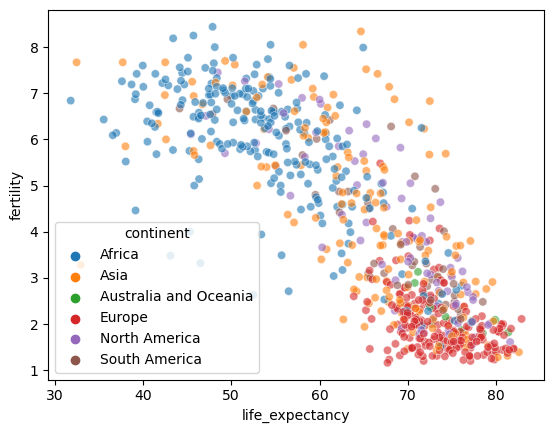

In [91]:
x = 'life_expectancy'; y='fertility'; z='GDP per capita'

sns.scatterplot(data=df_merged[::10], x=x, y=y, alpha=0.6, hue='continent' ) # Take every tenth sample

In [92]:
xmin = df_merged[x].min()
xmax = df_merged[x].max()
ymin = df_merged[y].min()
ymax = df_merged[y].max()
zmin = df_merged[z].min()
zmax = df_merged[z].max()

year_range = df_merged['year'].unique()
year_range

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
      dtype=object)

In [93]:
import random

def create_color(i) -> object:
    """Returns a random RBG color value

    Args:
        args (object): The string value to make a color for

    Returns:
        object: The color RBG value
    """
    random.seed(i)
    rand_number = random.randint(0,16777215)
    hex_number = str(hex(rand_number))
    hex_number ='#'+ hex_number[2:]
    return hex_number


In [94]:
continents = df_merged['continent'].unique()
colors = list(map(create_color ,continents))
color_continent_map = dict(zip(continents, colors))
color_continent_map


{'Asia': '#4cad25',
 'Europe': '#fbd444',
 'Africa': '#7e1683',
 'South America': '#d95436',
 'Australia and Oceania': '#c4ce3a',
 'North America': '#8c3645'}

In [95]:
continents = df_merged['continent'].unique()
continents

['Asia', 'Europe', 'Africa', 'South America', 'Australia and Oceania', 'North America']
Categories (6, object): ['Africa', 'Asia', 'Australia and Oceania', 'Europe', 'North America', 'South America']

In [96]:
amount_of_records = len(year_range)
amount_of_records

55

In [97]:
max_view_angle = 35
min_view_angle = 15
view_angle_range = max_view_angle - min_view_angle
view_angle_range

20

In [98]:
angle_animation_step = view_angle_range / amount_of_records
angle_animation_step

0.36363636363636365

In [99]:
from typing import Tuple
from matplotlib.patches import Patch

def map_to_legend_patch(color_info: Tuple[str, str]) -> Patch: 
    """Get a legend patch from a key value pair

    Args:
        i (int): The index
        k (string): The country key
        v (string): The hex color value

    Returns:
        Patch: The patch with the correct information
    """
    return Patch(facecolor=color_info[1], label=color_info[0])
    

In [100]:
color_array = list(color_continent_map.items())
color_array

[('Asia', '#4cad25'),
 ('Europe', '#fbd444'),
 ('Africa', '#7e1683'),
 ('South America', '#d95436'),
 ('Australia and Oceania', '#c4ce3a'),
 ('North America', '#8c3645')]

In [101]:
from typing import Dict, List

legend_elements: List[Patch] = list(map(map_to_legend_patch,color_array))
legend_props: Dict = {'size': 6}
    

In [102]:
import math
import numpy as np

population_ticks = np.linspace(int(zmin), int(zmax), num=10 ,endpoint=True)

[math.log(x) for x in population_ticks]

[5.932245187448011,
 9.77971788269179,
 10.462140972782375,
 10.864005673985291,
 11.14988267018883,
 11.371941609696812,
 11.553539437855484,
 11.707172847785989,
 11.840316112320625,
 11.957797166390785]

In [103]:
import os
 
dir = './artifacts/3d/'
if not os.path.exists(dir):
    os.makedirs(dir)

In [104]:

for f in os.listdir(dir):
    os.remove(os.path.join(dir, f))

In [128]:
from functools import partial
from matplotlib.ticker import NullFormatter, FixedLocator, ScalarFormatter
import numpy as np

for i, year in enumerate(year_range):
    fig = plt.figure(figsize=(10,6), dpi=300)
    fig.suptitle(f'Countries in {year}')

    ax = fig.add_subplot(projection = '3d')
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_zlim(np.log10(zmin), np.log10(zmax))
    ax.set_title(f'GDP per Capita vs Fertility vs Life Expectancy vs {z} vs Population Density')
    
    ax.set_xlabel("Lifetime expectancy (years)")
    ax.set_ylabel("Children per lifetime")
    ax.set_zlabel("GDP Per Capita log10($)")

    view_angle = i * angle_animation_step
    ax.view_init(view_angle / 2 + min_view_angle, view_angle + min_view_angle)
    
    for c in continents:
        df_subset = df_merged[(df_merged['year'] == year) & (df_merged['continent'] == c)]
        for index, row in df_subset.iterrows():
            x_df = row[x]
            y_f = row[y]
            z_df = row[z]
            population = row['density']
            color = color_continent_map[c]
            size = population/1e6
            # print(x,y,z)
            # print('x_df', x_df, 'y_f', y_f, 'z_df', np.log10(z_df), 'c', c,'Color', color,  'size', size)
            size = round(size * 100000)
            ax.scatter(xs=[x_df], ys=[y_f], zs=[np.log10(z_df)], label=c, c=color, s=size)
            

    ax.legend(loc='upper left', handles=legend_elements, prop=legend_props)
    fig.savefig(f'./artifacts/3d/lifeexp_{year}.png')
    plt.close()

In [129]:
import imageio

images = []

for i in year_range:
    filename = f'{dir}/lifeexp_{i}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave(f'{dir}/output.gif', images, fps=12)

/Users/earyzhe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  import sys
